# Aprendiendo a usar funcion para minimizar Xi

In [1]:
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Empezamos buscando la recta $$y=mx + n$$

#### Definimos la recta $$y=4x$$ 
Solo tendremos que buscar el valor de m que será 4

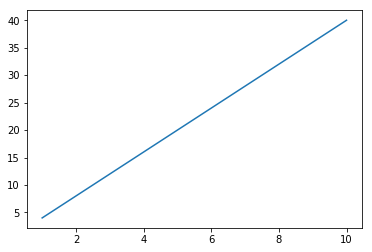

In [2]:
recta_objetivo = lambda x: 4*x
plt.plot(np.linspace(1,10, 10), recta_objetivo(np.linspace(1,10, 10)))

Definimos una muestra de datos experimentales y teoricos (catalogo) 
    - los teoricos seran simplemente pasar los datos experimentales por la funcion objetivo

In [3]:
x_experimental = np.linspace(1,10, 10)
y_catalogo = recta_objetivo(x_experimental)

Luego queremos encontrar una recta y=mx tal que represente correctamente los datos (datos experimentales vs teoricos)

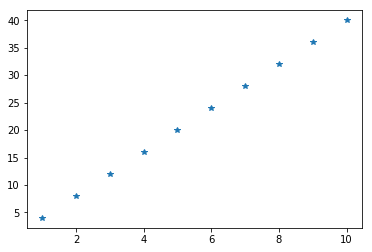

In [4]:
plt.plot(x_experimental, y_catalogo, "*")

#### Aplicando Xi

Primero definimos el constructor de rectas

In [5]:
def construct_recta(m):
    def recta(x):
        return x*m
    return recta

Ahora definimos el constructor para Xi tal que se busque minimizar la diferencia entre el valor teorico y el valor experimental

In [6]:
def construct_xi(valor_experimental, valor_teorico):
    def xi(m):
        recta = construct_recta(m)
        return (valor_teorico - recta(valor_experimental))**2
    return xi

Creamos un primer Xi con el respectivo par de valores experimental y teorico

In [7]:
xi_1 = construct_xi(x_experimental[0], y_catalogo[0])

Minimizamos usando la funcion optimize.fmin() que devuelve un arreglo con los valores de los parametros

In [8]:
minimun = optimize.fmin(xi_1, 1)
minimun

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 40


array([4.])

Por ultimo creamos una recta con el parametro minimizado por la funcion y lo comparamos con los datos que ya teniamos

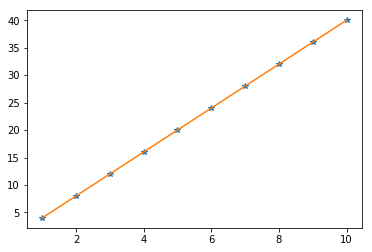

In [9]:
recta_experimental = construct_recta(m = minimun[0])
plt.plot(x_experimental, y_catalogo, "*")
plt.plot(x_experimental, recta_experimental(x_experimental))

Exito!

#### Ahora probamos con una ecuacion de recta completa $$y=4x+3$$
    - Primero nos dimos cuenta que al tener que minimizar dos variables y solo teniendo una ecuacion (y_teo=m*x_exp+n) tenemos una linea que corresponde a los (m,n) tal que la funcion se minimiza, para evitar esto sumamos todas las funciones xi que podemos crear a partir de la muestra de valores experimentales, como las funciones son estrictamente positivas y se busca minimizar no debería haber problema

In [10]:
recta_objetivo = lambda x: 4*x + 3
x_experimental = np.linspace(1,10, 10)
y_catalogo = recta_objetivo(x_experimental)

In [11]:
def construct_recta(m, n):
    def recta(x):
        return x*m + n
    return recta

In [12]:
def construct_xi(valor_experimental, valor_teorico):
    def xi(m, n):
        recta = construct_recta(m, n)
        return (valor_teorico - recta(valor_experimental))**2
    return xi

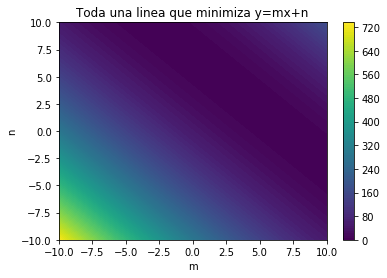

In [13]:
mini_xi = construct_xi(x_experimental[0], y_catalogo[0])
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = mini_xi(X, Y)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 100)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Toda una linea que minimiza y=mx+n')
ax.set_xlabel('m')
ax.set_ylabel('n')
plt.show()

Luego definimos el constructor y el "acumulate_xi" con todas las sumas de las funciones xi

$$(y_1-f(x_1))^2 + (y_2-f(x_2))^2 + (y_3-f(x_3))^2 + (y_4-f(x_4))^2 + ...$$

In [14]:
def construct_acumulate_xi(x_list, y_list):
    def acumulate_xi(params):
        m, n = params
        suma_xi = 0
        for x, y in zip(x_list, y_list):
            xi = construct_xi(x, y)
            suma_xi += xi(m, n)
        return suma_xi
    return acumulate_xi

In [15]:
acumulate_xi = construct_acumulate_xi(x_experimental, y_catalogo)
minimun = optimize.fmin(acumulate_xi, [1,1])
minimun

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 56
         Function evaluations: 105


array([3.99999273, 3.00004997])

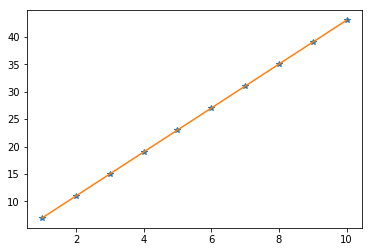

In [16]:
recta_experimental = construct_recta(m = minimun[0], n = minimun[1])
plt.plot(x_experimental, y_catalogo, "*")
plt.plot(x_experimental, recta_experimental(x_experimental))

## Ahora intentamos con un plano $$Ax+By+Cz = D$$

#### Como antes partiremos con un plano sencillo $$z=Ax+By$$
$$z=4x+3y$$

In [17]:
def plot_plano(plano):
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = plano(X, Y)
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X, Y, Z, 100)
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.set_title('Toda una linea que minimiza y=mx+n')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()

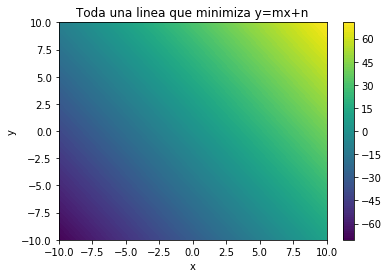

In [18]:
plano_objetivo = lambda x, y: 4*x + 3*y
plot_plano(plano_objetivo)

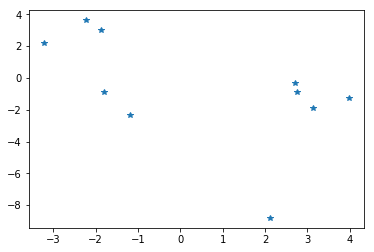

In [19]:
mu, sigma = 0, 3 # mean and standard deviation
x_experimental = np.random.normal(mu, sigma, 10)
y_experimental = np.random.normal(mu, sigma, 10)
z_catalogo = plano_objetivo(x_experimental, y_experimental)
plt.plot(x_experimental, y_experimental, "*")

In [20]:
def construct_plano(A, B):
    def plano(x, y):
        return A*x + B*y
    return plano

In [21]:
def construct_xi(x, y, z):
    def xi(A, B):
        plano = construct_plano(A, B)
        return (z - plano(x, y))**2
    return xi

In [22]:
def construct_acumulate_xi(x_list, y_list, z_list):
    def acumulate_xi(params):
        A, B = params
        suma_xi = 0
        for x, y, z in zip(x_list, y_list, z_list):
            xi = construct_xi(x, y, z)
            suma_xi += xi(A, B)
        return suma_xi
    return acumulate_xi

In [23]:
mega_xi = construct_acumulate_xi(x_experimental, y_experimental, z_catalogo)
minimun = optimize.fmin(mega_xi, [1,1])
minimun

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 46
         Function evaluations: 92


array([4.00003403, 2.9999991 ])

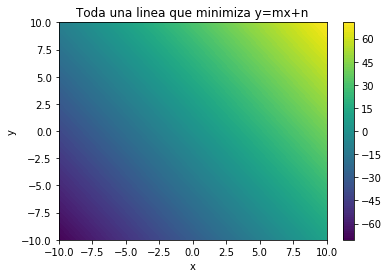

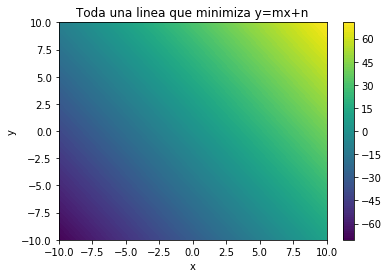

In [24]:
plano_experimental = construct_plano(A = minimun[0], B = minimun[1])
plot_plano(plano_experimental)
plot_plano(plano_objetivo)

#### Por ultimo probamos con un plano mas dificil $$-2x+4y+5z=-6$$
que despejando z queda $$z=-(-2x+4y+6)/5$$

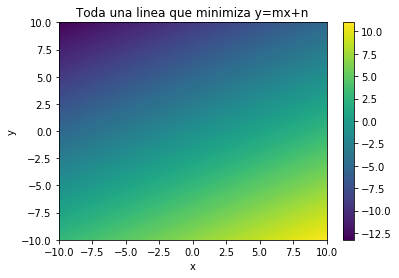

In [52]:
plano_objetivo = lambda x, y: -(-2*x + 4*y + 6)/5
plot_plano(plano_objetivo)

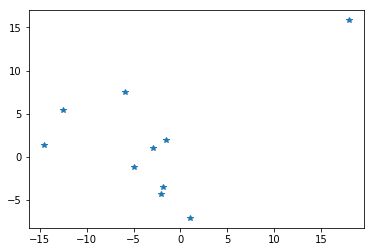

In [53]:
mu, sigma = 0, 10 # mean and standard deviation
x_experimental = np.random.normal(mu, sigma, 10)
y_experimental = np.random.normal(mu, sigma, 10)
z_catalogo = plano_objetivo(x_experimental, y_experimental)
plt.plot(x_experimental, y_experimental, "*")

In [54]:
def construct_plano(A, B, C, D):
    def plano(x, y):
        return -(A*x + B*y - D)/C
    return plano

In [55]:
def construct_xi(x, y, z):
    def xi(A, B, C, D):
        plano = construct_plano(A, B, C, D) 
        return (z - plano(x, y))**2
    return xi

In [56]:
def construct_acumulate_xi(x_list, y_list, z_list):
    def acumulate_xi(params):
        A, B, C, D = params
        suma_xi = 0
        for x, y, z in zip(x_list, y_list, z_list):
            xi = construct_xi(x, y, z)
            suma_xi += xi(A, B, C, D) 
        return suma_xi
    return acumulate_xi

In [57]:
mega_xi = construct_acumulate_xi(x_experimental, y_experimental, z_catalogo)
minimun = optimize.fmin(mega_xi, [-1,1,1,-1])
minimun

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 92
         Function evaluations: 157


array([-0.42060173,  0.84118049,  1.05146651, -1.26172448])

In [58]:
minimun*4

array([-1.68240691,  3.36472196,  4.20586603, -5.0468979 ])

Aunque los A B C D dan un poco distinto podemos mejorarlo agregando mas datos

Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 100
         Function evaluations: 181


array([-1.9563812 ,  3.91274413,  4.89094896, -5.8694924 ])

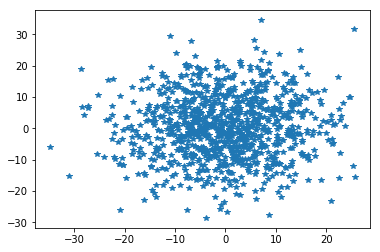

In [59]:
mu, sigma = 0, 10 # mean and standard deviation
x_experimental = np.random.normal(mu, sigma, 1000)
y_experimental = np.random.normal(mu, sigma, 1000)
z_catalogo = plano_objetivo(x_experimental, y_experimental)
plt.plot(x_experimental, y_experimental, "*")
mega_xi = construct_acumulate_xi(x_experimental, y_experimental, z_catalogo)
minimun = optimize.fmin(mega_xi, [-1,1,1,-1])
minimun*4

Comparamos los planos

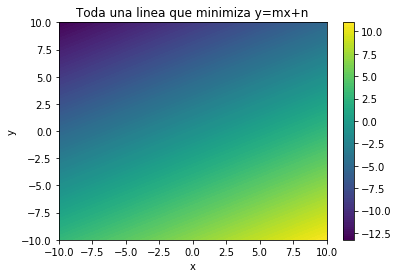

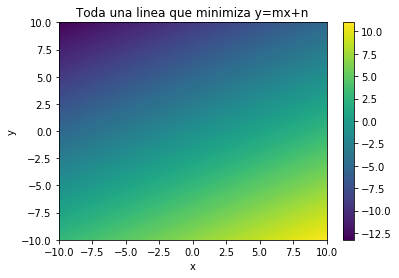

In [60]:
plano_experimental = construct_plano(A = minimun[0], B = minimun[1], C = minimun[2], D = minimun[3])
plot_plano(plano_experimental)
plot_plano(plano_objetivo)

#### Y que pasa con un plano aun mas dificil $$-2x+4y+5arcsin(z)=-6$$
que despejando z queda $$z=sin(-(-2x+4y+6)/5)$$

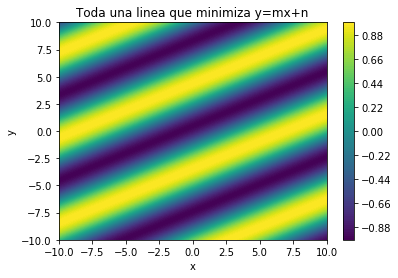

In [66]:
plano_objetivo = lambda x, y: np.sin(-(-2*x + 4*y + 6)/5)
plot_plano(plano_objetivo)

Solo cambiamos la manera en que definimos el plano

In [67]:
def construct_plano(A, B, C, D):
    def plano(x, y):
        return np.sin(-(A*x + B*y - D)/C)
    return plano

In [68]:
def construct_xi(x, y, z):
    def xi(A, B, C, D):
        plano = construct_plano(A, B, C, D) 
        return (z - plano(x, y))**2
    return xi

def construct_acumulate_xi(x_list, y_list, z_list):
    def acumulate_xi(params):
        A, B, C, D = params
        suma_xi = 0
        for x, y, z in zip(x_list, y_list, z_list):
            xi = construct_xi(x, y, z)
            suma_xi += xi(A, B, C, D) 
        return suma_xi
    return acumulate_xi

In [69]:
mu, sigma = 0, 10 # mean and standard deviation
x_experimental = np.random.normal(mu, sigma, 1000)
y_experimental = np.random.normal(mu, sigma, 1000)
z_catalogo = plano_objetivo(x_experimental, y_experimental)
# plt.plot(x_experimental, y_experimental, "*")

In [70]:
mega_xi = construct_acumulate_xi(x_experimental, y_experimental, z_catalogo)
minimun = optimize.fmin(mega_xi, [-1,3,4,-5])
print(np.array([-2., 4., 5., -6.]))
minimun*4/3

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 96
         Function evaluations: 171
[-2.  4.  5. -6.]


array([-1.86195878,  3.72392206,  4.65490247, -5.58578603])

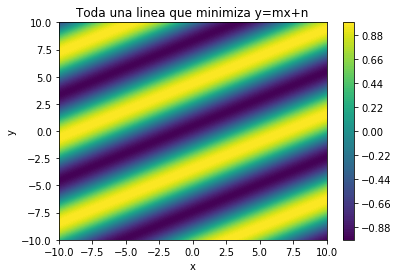

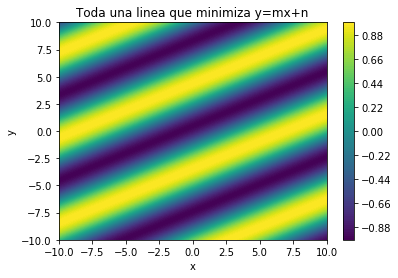

In [71]:
plano_experimental = construct_plano(A = minimun[0], B = minimun[1], C = minimun[2], D = minimun[3])
plot_plano(plano_experimental)
plot_plano(plano_objetivo)

#### Y que pasa con un plano aun mas y mas dificil $$-2sin(x)+4sin(y)+5z=-6$$
que despejando z queda $$z=-(-2sin(x)+4sin(y)+6)/5$$

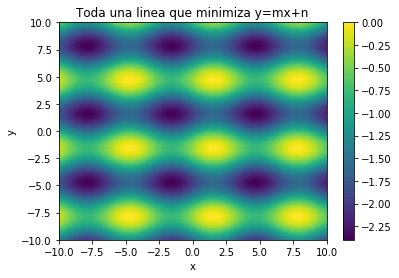

In [40]:
plano_objetivo = lambda x, y: -(-2*np.sin(x) + 4*np.sin(y) + 6)/5
plot_plano(plano_objetivo)

In [41]:
def construct_plano(A, B, C, D):
    def plano(x, y):
        return -(A*np.sin(x) + B*np.sin(y) - D)/C
    return plano

In [42]:
def construct_xi(x, y, z):
    def xi(A, B, C, D):
        plano = construct_plano(A, B, C, D) 
        return (z - plano(x, y))**2
    return xi

def construct_acumulate_xi(x_list, y_list, z_list):
    def acumulate_xi(params):
        A, B, C, D = params
        suma_xi = 0
        for x, y, z in zip(x_list, y_list, z_list):
            xi = construct_xi(x, y, z)
            suma_xi += xi(A, B, C, D) 
        return suma_xi
    return acumulate_xi

In [43]:
mu, sigma = 0, 10 # mean and standard deviation
x_experimental = np.random.normal(mu, sigma, 1000)
y_experimental = np.random.normal(mu, sigma, 1000)
z_catalogo = plano_objetivo(x_experimental, y_experimental)
# plt.plot(x_experimental, y_experimental, "*")

In [44]:
mega_xi = construct_acumulate_xi(x_experimental, y_experimental, z_catalogo)
minimun = optimize.fmin(mega_xi, [-1,1,1,-1])
print(np.array([-2., 4., 5., -6.]))
minimun*4

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 73
         Function evaluations: 133
[-2.  4.  5. -6.]


array([-1.92709057,  3.8544761 ,  4.81787961, -5.78157278])

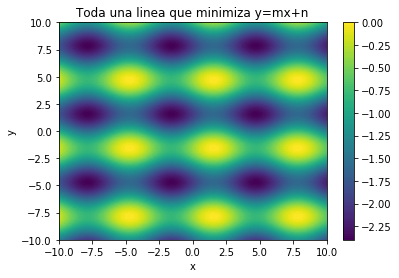

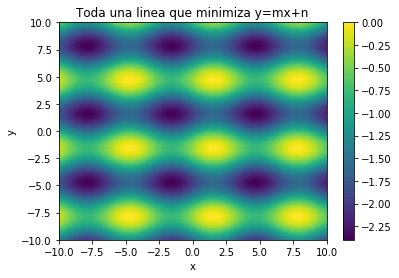

In [45]:
plano_experimental = construct_plano(A = minimun[0], B = minimun[1], C = minimun[2], D = minimun[3])
plot_plano(plano_experimental)
plot_plano(plano_objetivo)

#### volvamonos locos $$-2sin(x)+4sin(y)^3+5z=-6$$
que despejando z queda $$z=-(-2sin(x)+4sin(y)^3+6)/5$$

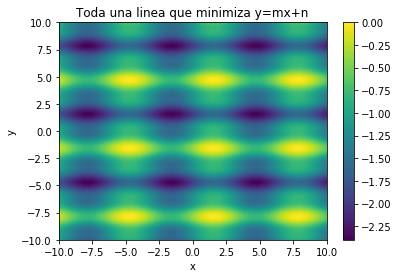

In [46]:
plano_objetivo = lambda x, y: -(-2*np.sin(x) + 4*np.sin(y)**3 + 6)/5
plot_plano(plano_objetivo)

In [47]:
def construct_plano(A, B, C, D, E):
    def plano(x, y):
        return -(A*np.sin(x) + B*np.sin(y)**E - D)/C
    return plano

In [48]:
def construct_xi(x, y, z):
    def xi(A, B, C, D, E):
        plano = construct_plano(A, B, C, D, E) 
        return (z - plano(x, y))**2
    return xi

def construct_acumulate_xi(x_list, y_list, z_list):
    def acumulate_xi(params):
        A, B, C, D, E = params
        suma_xi = 0
        for x, y, z in zip(x_list, y_list, z_list):
            xi = construct_xi(x, y, z)
            suma_xi += xi(A, B, C, D, E) 
        return suma_xi
    return acumulate_xi

In [49]:
mu, sigma = 0, 10 # mean and standard deviation
x_experimental = np.random.normal(mu, sigma, 1000)
y_experimental = np.random.normal(mu, sigma, 1000)
z_catalogo = plano_objetivo(x_experimental, y_experimental)
# plt.plot(x_experimental, y_experimental, "*")

In [50]:
mega_xi = construct_acumulate_xi(x_experimental, y_experimental, z_catalogo)
minimun = optimize.fmin(mega_xi, [-1,1,1,-1, 1])
print(np.array([-2., 4., 5., -6., 3.]))
minimun

c:\users\karlos\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\karlos\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Optimization terminated successfully.
         Current function value: 301.038536
         Iterations: 50
         Function evaluations: 349
[-2.  4.  5. -6.  3.]


array([-1.        ,  1.        ,  1.03993574, -1.01006426,  1.        ])

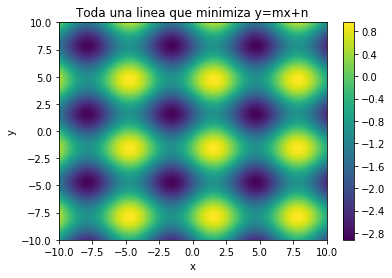

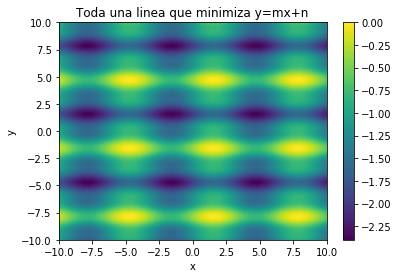

In [51]:
plano_experimental = construct_plano(A = minimun[0], B = minimun[1], C = minimun[2], D = minimun[3], E = minimun[4])
plot_plano(plano_experimental)
plot_plano(plano_objetivo)

Nope!